# Proyecto de Ciencia de datos
**Proyecto**: Modelos Predictivos para la Estimación de Ventas de un Hotel
Resort en un Contexto de Crisis Económica       
**Estudiante**: Favio Rafael Guerra Calle                                                 
**Carrera**: Lic.Ingenieria Informatica


## **Fase 1**: Comprension del Negocio

Realizar predicciones de desempeño a futuro de las ventas de un hotel resort en un contexto de crisis económica, mediante el uso de modelos predictivos con el fin de apoyar la toma de decisiones estratégicas y evaluar la viabilidad del negocio.




## **Fase 2**: Comprension de los Datos

 **Hotel Resort**

Importacion de librerias inicial

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import PowerTransformer

Carga de datos

In [9]:
df = pd.read_excel(r"../Data_Source/HotelResort.xlsx")

In [10]:
df_dolar = pd.read_excel(r"../Data_Source/DolarParalelo.xlsx")

In [11]:
df

,Fecha Actual,Fecha de ingreso,Razon social,Nombre del cliente,PAQUETE,TIEMPO DE ESTADIA,TOTAL FACTURA,IMPORTE PAGADO,SALDO POR COBRAR,EJECUTIVO,OBSERVACIONES
0,2022-01-03 00:00:00,2022-01-01 00:00:00,susan zelada,susan zelada,full day 1ro de enero,NaN,420.0,420,deposito,Nicole Sanabria,full day 2 entradas mayores y 2 menores
1,2022-01-04 00:00:00,2022-01-04 00:00:00,Carla lorena fernandez,Carla lorena fernandez,cabaña de 2h Entre semana: 3 adultos +2 niños ...,2D1N,2082.0,2082,Efectivo recepcion,Nicole Sanabria,cancela al ingresar a recepcion
2,2022-01-04 00:00:00,2022-01-04 00:00:00,VELASCO,SIMON VELASCO,Cabaña 3h entre semana 7 personas,2D1N,3002.0,3002,deposito,Nicole Sanabria,CAMAS\n1 MATRIMONIAL\n5 INDIVIDUALES
3,2022-01-04 00:00:00,2022-01-04 00:00:00,Hugo Mauricio Franco Burgos,Hugo Mauricio Franco Burgos,Lagoon Suite entre semana,2D1N,793.0,793,deposito,Nicole Sanabria,SUITE LAGOON ENTRE SEMANA
4,2022-01-04 00:00:00,2022-09-16 00:00:00,Patricia Mora,Zenon Antezana,Vacaciones a credito Cabaña 3h,3D2N,1241.0,1241,deposito,Nicole Sanabria,pago cuota 2 vacciones a credito
...,...,...,...,...,...,...,...,...,...,...,...
2050,2024-01-27 00:00:00,2024-01-28 00:00:00,Suany Suárez Ortiz,70299199,NaN,1690,1690.0,NaN,SANTY - NICOLE,FULLDAY 13 ADULTOS,NaN
2051,2024-01-27 00:00:00,2024-01-27 00:00:00,KENY MARCELO FLORES GALINDO,76068050,2D1N,610,610.0,NaN,SANTY - NICOLE,"HOSPEDAJE SIMPLE + DESAYUNO DIA 2 , 2 PERSONAS",NaN
2052,2024-01-28 00:00:00,2024-01-28 00:00:00,William Hugo Durán yabeta,70958271,NaN,390,390.0,NaN,SANTY - NICOLE,3 fullday adultos,NaN
2053,2024-01-28 00:00:00,2024-01-28 00:00:00,Bruno Peredo,67708780,NaN,260,260.0,NaN,SANTY - NICOLE,2 fullday adultos,NaN


In [12]:
#df['mes'] = df.index.month
#df['año'] = df.index.year

In [13]:
# Promediar el valor del dólar por mes y año (por si hay más de un valor por mes)
#df_dolar_promedio = df_dolar.groupby(['año', 'mes'])['precio'].mean().reset_index()

In [14]:
#df = df.merge(df_dolar_promedio, on=['año', 'mes'], how='left')

# Rellenamos valores faltantes con 6.96
#df['precio'] = df['precio'].fillna(6.96)

# Mostrar las primeras filas del resultado
#df.head()

In [15]:
print(df.columns)

Index(['Fecha Actual', 'Fecha de ingreso', 'Razon social',
       'Nombre del cliente', 'PAQUETE', 'TIEMPO DE ESTADIA', 'TOTAL FACTURA',
       'IMPORTE PAGADO', 'SALDO POR COBRAR', 'EJECUTIVO', 'OBSERVACIONES'],
      dtype='object')


In [16]:
df = df.rename(columns={'Fecha Actual': 'Fecha', 'TOTAL FACTURA': 'TotalFactura'})

In [17]:
df = df[['Fecha', 'TotalFactura']]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fecha         2041 non-null   object 
 1   TotalFactura  2051 non-null   float64
dtypes: float64(1), object(1)
memory usage: 32.2+ KB


In [19]:
print(df['TotalFactura'].describe())

count     2051.000000
mean       829.544725
std       1333.059079
min          0.000000
25%        258.000000
50%        490.000000
75%       1000.000000
max      40341.500000
Name: TotalFactura, dtype: float64


Convierte a formato fecha

In [21]:
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
df['TotalFactura'] = pd.to_numeric(df['TotalFactura'], errors='coerce')

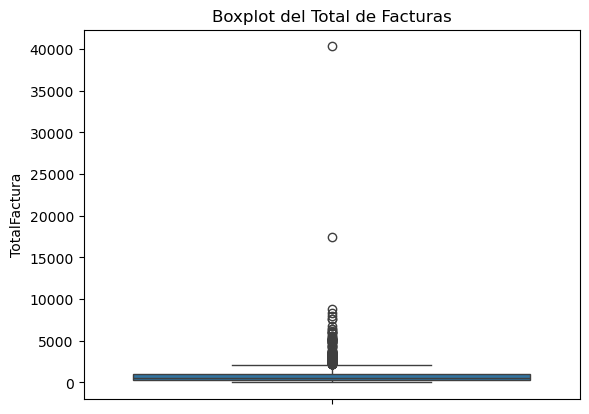

In [22]:
sns.boxplot(df['TotalFactura'])
plt.title('Boxplot del Total de Facturas')
plt.show()

In [23]:
Q1 = df['TotalFactura'].quantile(0.25)
Q3 = df['TotalFactura'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['TotalFactura'] < lower_bound) | (df['TotalFactura'] > upper_bound)]
num_outliers = len(outliers)

print(f"Hay {num_outliers} outliers en TotalFactura.")

Hay 138 outliers en TotalFactura.


Elimina filas con valores nulos

In [25]:
print(df.isnull().sum())
df.dropna(subset=['Fecha', 'TotalFactura'], inplace=True)

Fecha           15
TotalFactura     4
dtype: int64


Media, mediana, desviación estándar

In [27]:
df.count()

Fecha           2037
TotalFactura    2037
dtype: int64

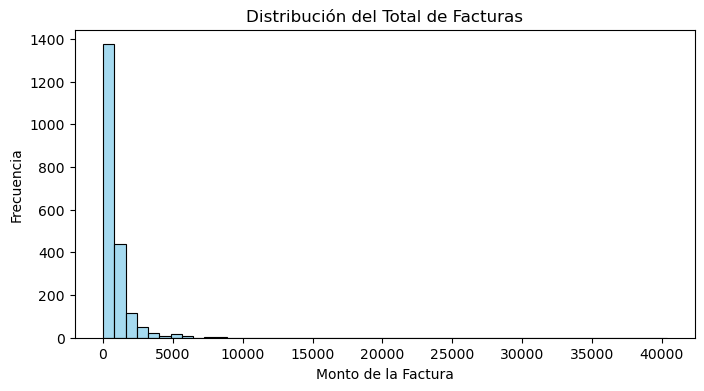

In [28]:
plt.figure(figsize=(8, 4))
sns.histplot(df['TotalFactura'], bins=50, color='skyblue')
plt.title('Distribución del Total de Facturas')
plt.xlabel('Monto de la Factura')
plt.ylabel('Frecuencia')
plt.show()

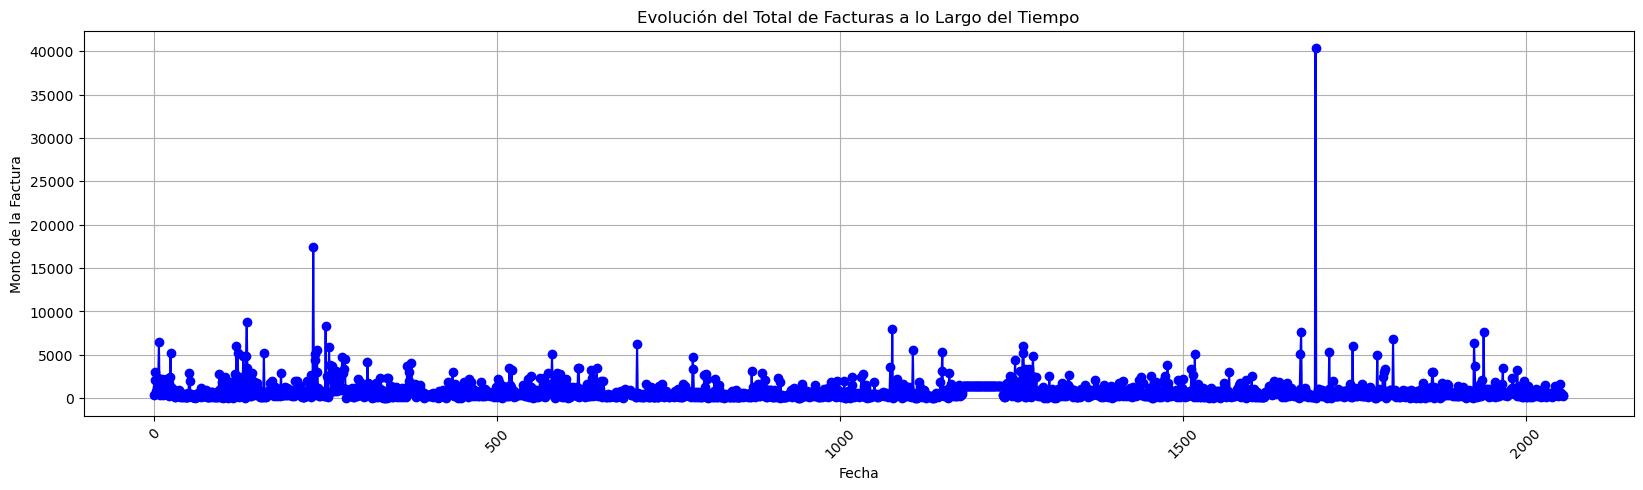

In [29]:
plt.figure(figsize=(20, 5))
plt.plot(df.index, df['TotalFactura'], marker='o', color='blue')
plt.title('Evolución del Total de Facturas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Monto de la Factura')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [30]:
Q1 = df['TotalFactura'].quantile(0.25)
Q3 = df['TotalFactura'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['TotalFactura'] < lower_bound) | (df['TotalFactura'] > upper_bound)]
num_outliers = len(outliers)

print(f"Hay {num_outliers} outliers en TotalFactura.")

Hay 138 outliers en TotalFactura.


Prueba de estacionalidad

In [32]:
resultado_adf = adfuller(df['TotalFactura'])
print('Estadístico ADF:', resultado_adf[0])
print('p-valor:', resultado_adf[1])
print('Valores Críticos:')
for clave, valor in resultado_adf[4].items():
    print(f'   {clave}: {valor:.4f}')

Estadístico ADF: -16.70575184384834
p-valor: 1.4485355652634808e-29
Valores Críticos:
   1%: -3.4336
   5%: -2.8630
   10%: -2.5675


In [33]:
resultado_kpss = kpss(df['TotalFactura'], regression='c')
print('Estadístico KPSS:', resultado_kpss[0])
print('p-valor:', resultado_kpss[1])
print('Valores Críticos:')
for clave, valor in resultado_kpss[3].items():
    print(f'   {clave}: {valor:.4f}')

Estadístico KPSS: 0.42214173913608355
p-valor: 0.06761131933789502
Valores Críticos:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390


Agrupar las fechas iguales

## **Fase 3**: Preparacion de los Datos

 **Hotel Resort**

Agrupar las fechas iguales

In [38]:
df = df.groupby('Fecha').sum()

In [39]:
rango_completo = pd.date_range(
    start=df.index.min(),
    end=df.index.max(),
    freq='D'
)

In [40]:
df = df.reindex(rango_completo)

In [41]:
df['TotalFactura'] = df['TotalFactura'].fillna(0)

In [42]:
df = df.resample('W').sum()

**Exploracion de Datos**

In [44]:
df.count()

TotalFactura    165
dtype: int64

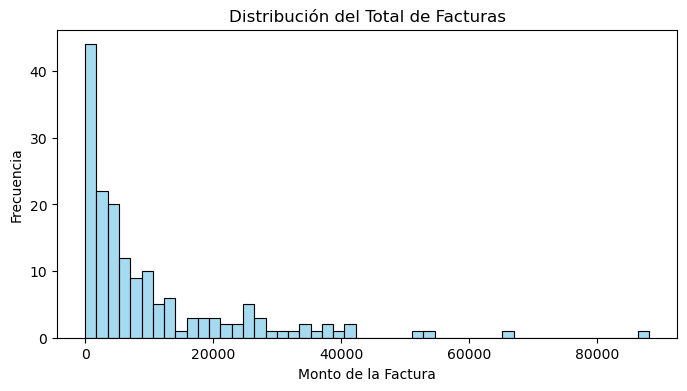

In [45]:
plt.figure(figsize=(8, 4))
sns.histplot(df['TotalFactura'], bins=50, color='skyblue')
plt.title('Distribución del Total de Facturas')
plt.xlabel('Monto de la Factura')
plt.ylabel('Frecuencia')
plt.show()

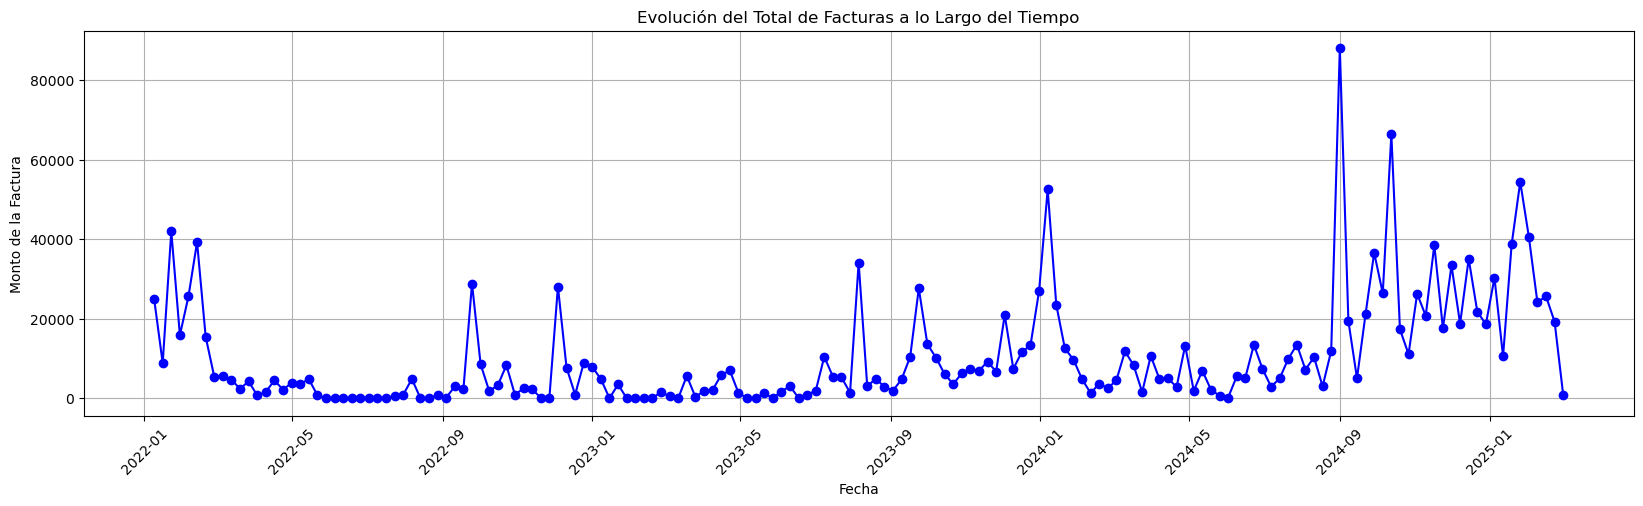

In [46]:
plt.figure(figsize=(20, 5))
plt.plot(df.index, df['TotalFactura'], marker='o', color='blue')
plt.title('Evolución del Total de Facturas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Monto de la Factura')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

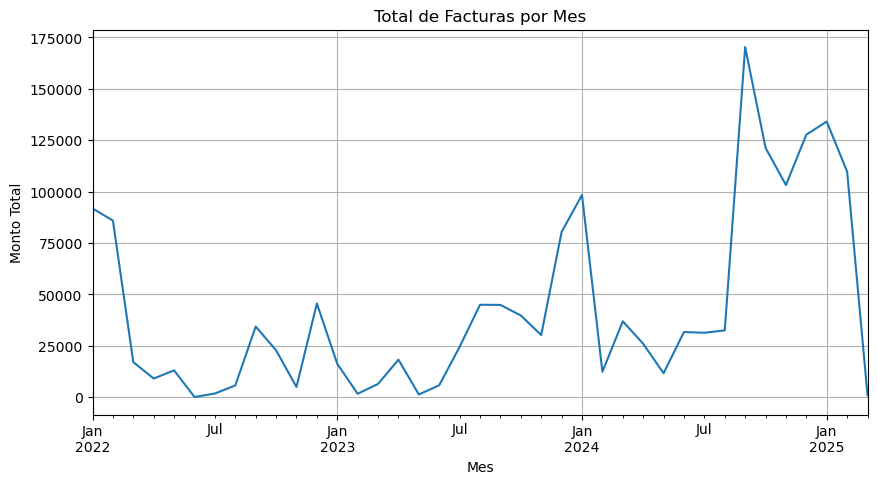

In [47]:
df.sort_index(inplace=True)
df['TotalFactura'].resample('ME').sum().plot(title='Total de Facturas por Mes', figsize=(10, 5))
plt.ylabel('Monto Total')
plt.xlabel('Mes')
plt.grid(True)
plt.show()

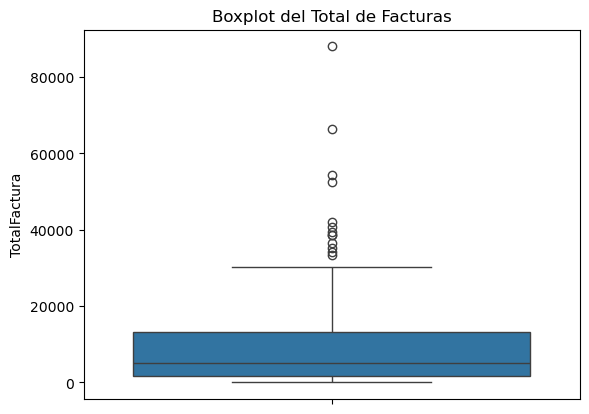

In [48]:
sns.boxplot(df['TotalFactura'])
plt.title('Boxplot del Total de Facturas')
plt.show()

Revizamos los outliers pero no se eliminara debido a la importancia de los mismos

In [50]:
Q1 = df['TotalFactura'].quantile(0.25)
Q3 = df['TotalFactura'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['TotalFactura'] < lower_bound) | (df['TotalFactura'] > upper_bound)]
num_outliers = len(outliers)

print(f"There are {num_outliers} outliers in TotalFactura.")

There are 13 outliers in TotalFactura.


In [51]:
Q1 = df['TotalFactura'].quantile(0.25)
Q3 = df['TotalFactura'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detectar outliers
outliers = df[(df['TotalFactura'] < lower_bound) | (df['TotalFactura'] > upper_bound)]

# Seleccionar los 4 más extremos
outliers_top4 = outliers.reindex(outliers['TotalFactura'].abs().sort_values(ascending=False).index[:3])
print(outliers_top4)

            TotalFactura
2024-09-01       88090.0
2024-10-13       66446.5
2025-01-26       54474.5


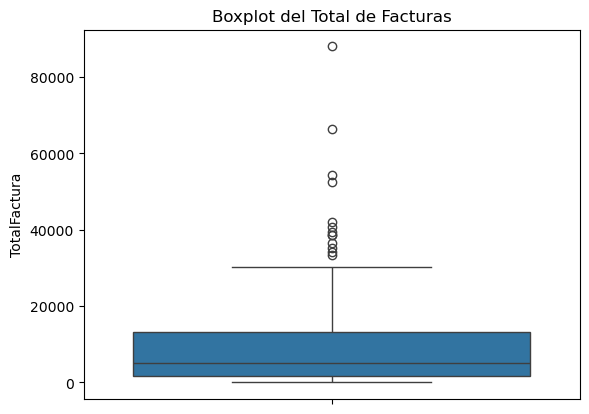

In [52]:
sns.boxplot(df['TotalFactura'])
plt.title('Boxplot del Total de Facturas')
plt.show()

In [53]:
for i in range(len(outliers_top4)):
    idx = outliers_top4.index[i]
    # Opción 1: reemplazo por la media de los vecinos anteriores y posteriores
    prev_idx = df.index[df.index.get_loc(idx) - 1] if df.index.get_loc(idx) - 1 >= 0 else df.index[0]
    next_idx = df.index[df.index.get_loc(idx) + 1] if df.index.get_loc(idx) + 1 < len(df) else df.index[-1]

    prev_val = df['TotalFactura'].loc[prev_idx]
    next_val = df['TotalFactura'].loc[next_idx]
    suavizado = (prev_val + next_val) / 2

    df.at[idx, 'TotalFactura'] = suavizado

Revision de autocorrelacion

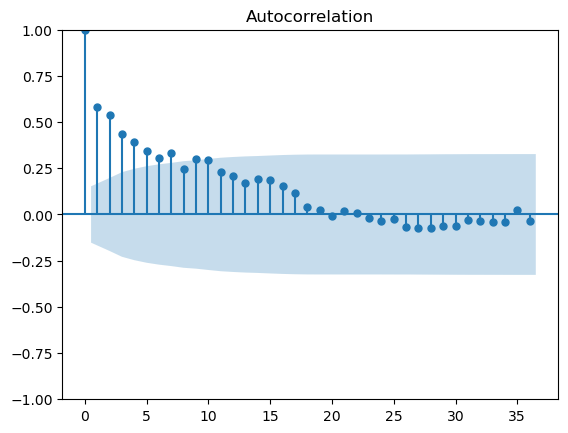

In [55]:
plot_acf(df['TotalFactura'], lags=36, alpha=0.05)
plt.show()

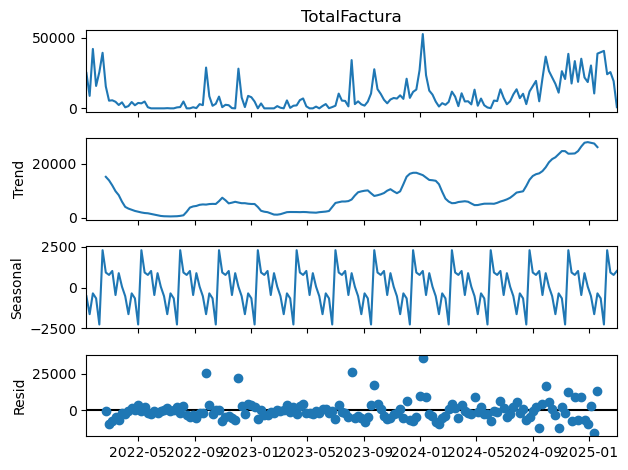

In [56]:
resultado = seasonal_decompose(df['TotalFactura'], model='additive', period=12)
resultado.plot()
plt.show()

Transformacion de Datos para estacionalidad

In [58]:
df['Diferenciada'] = df['TotalFactura'].diff()
df = df.dropna()

In [59]:
resultado_adf = adfuller(df['Diferenciada'])
print('Estadístico ADF:', resultado_adf[0])
print('p-valor:', resultado_adf[1])
print('Valores Críticos:')
for clave, valor in resultado_adf[4].items():
    print(f'   {clave}: {valor:.4f}')

Estadístico ADF: -6.574221614816065
p-valor: 7.798345695072258e-09
Valores Críticos:
   1%: -3.4733
   5%: -2.8804
   10%: -2.5768


In [60]:
resultado_kpss = kpss(df['Diferenciada'], regression='c')
print('Estadístico KPSS:', resultado_kpss[0])
print('p-valor:', resultado_kpss[1])
print('Valores Críticos:')
for clave, valor in resultado_kpss[3].items():
    print(f'   {clave}: {valor:.4f}')

Estadístico KPSS: 0.10759628481849069
p-valor: 0.1
Valores Críticos:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390


C:\Users\Farzor\AppData\Local\Temp\ipykernel_17224\2476956065.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado_kpss = kpss(df['Diferenciada'], regression='c')


In [61]:
# Prueba ADF
resultado_adf = adfuller(df['TotalFactura'])
# Prueba KPSS
resultado_kpss = kpss(df['TotalFactura'], regression='c')

# Mostrar resultados combinados
print("----- Análisis de Estacionariedad -----")
print("Prueba ADF (Augmented Dickey-Fuller):")
print(f"  Estadístico ADF: {resultado_adf[0]:.4f}")
print(f"  p-valor: {resultado_adf[1]:.4f}")
print("  Valores Críticos:")
for clave, valor in resultado_adf[4].items():
    print(f"    {clave}: {valor:.4f}")

print("\nPrueba KPSS (Kwiatkowski-Phillips-Schmidt-Shin):")
print(f"  Estadístico KPSS: {resultado_kpss[0]:.4f}")
print(f"  p-valor: {resultado_kpss[1]:.4f}")
print("  Valores Críticos:")
for clave, valor in resultado_kpss[3].items():
    print(f"    {clave}: {valor:.4f}")

# Interpretación general
print("\nInterpretación general:")
if resultado_adf[1] < 0.05:
    print("  ➤ ADF indica que la serie es estacionaria (rechaza H0).")
else:
    print("  ➤ ADF indica que la serie NO es estacionaria (no rechaza H0).")

if resultado_kpss[1] < 0.05:
    print("  ➤ KPSS indica que la serie NO es estacionaria (rechaza H0).")
else:
    print("  ➤ KPSS indica que la serie es estacionaria (no rechaza H0).")

----- Análisis de Estacionariedad -----
Prueba ADF (Augmented Dickey-Fuller):
  Estadístico ADF: -1.4524
  p-valor: 0.5569
  Valores Críticos:
    1%: -3.4735
    5%: -2.8805
    10%: -2.5769

Prueba KPSS (Kwiatkowski-Phillips-Schmidt-Shin):
  Estadístico KPSS: 0.8221
  p-valor: 0.0100
  Valores Críticos:
    10%: 0.3470
    5%: 0.4630
    2.5%: 0.5740
    1%: 0.7390

Interpretación general:
  ➤ ADF indica que la serie NO es estacionaria (no rechaza H0).
  ➤ KPSS indica que la serie NO es estacionaria (rechaza H0).


C:\Users\Farzor\AppData\Local\Temp\ipykernel_17224\1237474146.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado_kpss = kpss(df['TotalFactura'], regression='c')


In [62]:
# Prueba ADF
resultado_adf = adfuller(df['Diferenciada'])
# Prueba KPSS
resultado_kpss = kpss(df['Diferenciada'], regression='c')

# Mostrar resultados combinados
print("----- Análisis de Estacionariedad -----")
print("Prueba ADF (Augmented Dickey-Fuller):")
print(f"  Estadístico ADF: {resultado_adf[0]:.4f}")
print(f"  p-valor: {resultado_adf[1]:.4f}")
print("  Valores Críticos:")
for clave, valor in resultado_adf[4].items():
    print(f"    {clave}: {valor:.4f}")

print("\nPrueba KPSS (Kwiatkowski-Phillips-Schmidt-Shin):")
print(f"  Estadístico KPSS: {resultado_kpss[0]:.4f}")
print(f"  p-valor: {resultado_kpss[1]:.4f}")
print("  Valores Críticos:")
for clave, valor in resultado_kpss[3].items():
    print(f"    {clave}: {valor:.4f}")

# Interpretación general
print("\nInterpretación general:")
if resultado_adf[1] < 0.05:
    print("  ➤ ADF indica que la serie es estacionaria (rechaza H0).")
else:
    print("  ➤ ADF indica que la serie NO es estacionaria (no rechaza H0).")

if resultado_kpss[1] < 0.05:
    print("  ➤ KPSS indica que la serie NO es estacionaria (rechaza H0).")
else:
    print("  ➤ KPSS indica que la serie es estacionaria (no rechaza H0).")

----- Análisis de Estacionariedad -----
Prueba ADF (Augmented Dickey-Fuller):
  Estadístico ADF: -6.5742
  p-valor: 0.0000
  Valores Críticos:
    1%: -3.4733
    5%: -2.8804
    10%: -2.5768

Prueba KPSS (Kwiatkowski-Phillips-Schmidt-Shin):
  Estadístico KPSS: 0.1076
  p-valor: 0.1000
  Valores Críticos:
    10%: 0.3470
    5%: 0.4630
    2.5%: 0.5740
    1%: 0.7390

Interpretación general:
  ➤ ADF indica que la serie es estacionaria (rechaza H0).
  ➤ KPSS indica que la serie es estacionaria (no rechaza H0).


C:\Users\Farzor\AppData\Local\Temp\ipykernel_17224\1474541210.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado_kpss = kpss(df['Diferenciada'], regression='c')


**Analisis ACF Y PACF**

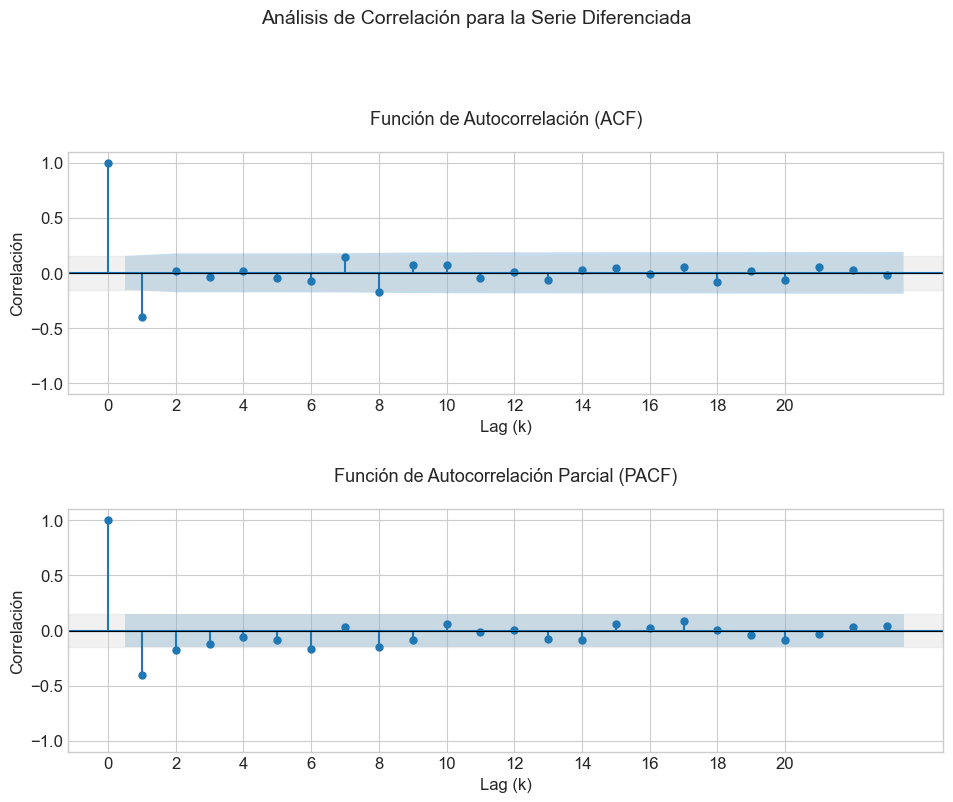

In [64]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Configuración estética para gráficos
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.size': 12,
    'figure.titlesize': 14,
    'axes.titlesize': 13,
    'axes.labelsize': 12
})

# 1. Diferenciación con manejo de NaN más robusto
df["Diferenciada"] = df["TotalFactura"].diff().dropna()
# 2. Configuración de gráficos profesional
fig, axes = plt.subplots(2, 1, figsize=(10, 8))  # Vertical para mejor lectura

# ACF con intervalos de confianza al 95% y 99%
plot_acf(df["Diferenciada"].dropna(), ax=axes[0])  # ACF para MA(q)
axes[0].set_title("Gráfico ACF (Autocorrelación)")


plot_pacf(df["Diferenciada"].dropna(), ax=axes[1])  # PACF para AR(p)
axes[1].set_title("Gráfico PACF (Autocorrelación Parcial)")

# 3. Personalización profesional
axes[0].set_title('Función de Autocorrelación (ACF)', pad=20)
axes[1].set_title('Función de Autocorrelación Parcial (PACF)', pad=20)

for ax in axes:
    ax.set_xlabel('Lag (k)')
    ax.set_ylabel('Correlación')
    ax.set_ylim(-1.1, 1.1)  # Rango fijo para comparación
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

    # Líneas de significancia mejoradas
    ax.axhspan(-1.96/np.sqrt(len(df["Diferenciada"])),
               1.96/np.sqrt(len(df["Diferenciada"])),
               color='lightgray', alpha=0.3, label='IC 95%')

    # Solo mostrar lags enteros
    ax.set_xticks(np.arange(0, 21, 2))
    ax.set_xticklabels(np.arange(0, 21, 2))

# 4. Elementos adicionales
plt.suptitle('Análisis de Correlación para la Serie Diferenciada', y=1.02)
plt.tight_layout(pad=2.0)

# 5. Guardar en alta calidad
plt.savefig('acf_pacf.png',
            dpi=300,
            bbox_inches='tight',
            format='png')

plt.show()

**Transformaciones Y Division de datos**

Division


In [67]:
train_size = int(len(df) * 0.80)

Normal

In [69]:
train_normal, test_normal = df['TotalFactura'][:train_size], df['TotalFactura'][train_size:]

Cuadratica

In [71]:
df['TotalFactura_sqrt'] = np.sqrt(df['TotalFactura'])

In [72]:
#División de datos Cuadratica
train_size_sqrt = int(len(df) * 0.80)
train_sqrt = df['TotalFactura_sqrt'][:train_size_sqrt]
test_sqrt = df['TotalFactura_sqrt'][train_size_sqrt:]

Logaritmica

In [74]:
#Logaritmo natural
df['Log_TotalFactura'] = np.log1p(df['TotalFactura'])

In [75]:
train_size_log = int(len(df) * 0.80)
train_log = df['Log_TotalFactura'][:train_size_log]
test_log = df['Log_TotalFactura'][train_size_log:]

In [76]:
# Prueba ADF
resultado_adf = adfuller(df['Log_TotalFactura'])
# Prueba KPSS
resultado_kpss = kpss(df['Log_TotalFactura'], regression='c')

# Mostrar resultados combinados
print("----- Análisis de Estacionariedad -----")
print("Prueba ADF (Augmented Dickey-Fuller):")
print(f"  Estadístico ADF: {resultado_adf[0]:.4f}")
print(f"  p-valor: {resultado_adf[1]:.4f}")
print("  Valores Críticos:")
for clave, valor in resultado_adf[4].items():
    print(f"    {clave}: {valor:.4f}")

print("\nPrueba KPSS (Kwiatkowski-Phillips-Schmidt-Shin):")
print(f"  Estadístico KPSS: {resultado_kpss[0]:.4f}")
print(f"  p-valor: {resultado_kpss[1]:.4f}")
print("  Valores Críticos:")
for clave, valor in resultado_kpss[3].items():
    print(f"    {clave}: {valor:.4f}")

# Interpretación general
print("\nInterpretación general:")
if resultado_adf[1] < 0.05:
    print("  ➤ ADF indica que la serie es estacionaria (rechaza H0).")
else:
    print("  ➤ ADF indica que la serie NO es estacionaria (no rechaza H0).")

if resultado_kpss[1] < 0.05:
    print("  ➤ KPSS indica que la serie NO es estacionaria (rechaza H0).")
else:
    print("  ➤ KPSS indica que la serie es estacionaria (no rechaza H0).")

----- Análisis de Estacionariedad -----
Prueba ADF (Augmented Dickey-Fuller):
  Estadístico ADF: -3.4396
  p-valor: 0.0097
  Valores Críticos:
    1%: -3.4716
    5%: -2.8797
    10%: -2.5764

Prueba KPSS (Kwiatkowski-Phillips-Schmidt-Shin):
  Estadístico KPSS: 0.7893
  p-valor: 0.0100
  Valores Críticos:
    10%: 0.3470
    5%: 0.4630
    2.5%: 0.5740
    1%: 0.7390

Interpretación general:
  ➤ ADF indica que la serie es estacionaria (rechaza H0).
  ➤ KPSS indica que la serie NO es estacionaria (rechaza H0).


C:\Users\Farzor\AppData\Local\Temp\ipykernel_17224\1961357400.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado_kpss = kpss(df['Log_TotalFactura'], regression='c')


TotalFactura_yeojohnson

In [78]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df['TotalFactura_yeojohnson'] = pt.fit_transform(df[['TotalFactura']])

In [79]:
#División de datos yeo-johnson
train_size_yj = int(len(df) * 0.80)
train_yj = df['TotalFactura_yeojohnson'][:train_size_yj]
test_yj = df['TotalFactura_yeojohnson'][train_size_yj:]

variables exogenas

In [81]:
df['campaña_marketing'] = 1
df.loc[df.index >= '2023-07-12', 'campaña_marketing'] = 0  # desde cuando empezó la campaña

df['cierre_hotel'] = 1
df.loc[(df.index >= '2022-05-21') & (df.index <= '2022-07-11'), 'cierre_hotel'] = 0  # cierre por remodelación

## **Fase 4**: Modelamiento

 **Hotel Resort**

### **ARIMA**

In [85]:
modelo_arima = ARIMA(df['TotalFactura'], order=(1,1,1))
resultado_arima = modelo_arima.fit()
print(resultado_arima.summary())

                               SARIMAX Results                                
Dep. Variable:           TotalFactura   No. Observations:                  164
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1709.698
Date:                Mon, 09 Jun 2025   AIC                           3425.396
Time:                        00:40:02   BIC                           3434.677
Sample:                    01-16-2022   HQIC                          3429.164
                         - 03-02-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2663      0.090      2.953      0.003       0.090       0.443
ma.L1         -0.8425      0.060    -13.982      0.000      -0.961      -0.724
sigma2       7.23e+07   2.44e-10   2.97e+17      0.0

In [86]:
modelo_arima = ARIMA(df['TotalFactura'], order=(0,1,1))
resultado_arima = modelo_arima.fit()
print(resultado_arima.summary())

                               SARIMAX Results                                
Dep. Variable:           TotalFactura   No. Observations:                  164
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1712.335
Date:                Mon, 09 Jun 2025   AIC                           3428.669
Time:                        00:40:02   BIC                           3434.857
Sample:                    01-16-2022   HQIC                          3431.181
                         - 03-02-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6821      0.054    -12.614      0.000      -0.788      -0.576
sigma2      7.229e+07   1.41e-10   5.11e+17      0.000    7.23e+07    7.23e+07
Ljung-Box (L1) (Q):                   1.63   Jarque-

In [87]:
df['Predicción_ARIMA'] = resultado_arima.fittedvalues

In [88]:
modelo_arima_train = ARIMA(train_normal, order=(0, 1, 1))
resultado_arima_train = modelo_arima.fit()
print(resultado_arima_train.summary())

                               SARIMAX Results                                
Dep. Variable:           TotalFactura   No. Observations:                  164
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1712.335
Date:                Mon, 09 Jun 2025   AIC                           3428.669
Time:                        00:40:02   BIC                           3434.857
Sample:                    01-16-2022   HQIC                          3431.181
                         - 03-02-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6821      0.054    -12.614      0.000      -0.788      -0.576
sigma2      7.229e+07   1.41e-10   5.11e+17      0.000    7.23e+07    7.23e+07
Ljung-Box (L1) (Q):                   1.63   Jarque-

In [89]:
prediccion_arima = resultado_arima_train.forecast(steps=len(test_normal))
prediccion_arima.index = test_normal.index

### **SARIMA**

In [91]:
modelo_sarima = sm.tsa.SARIMAX(train_normal,
                               order=(0,1,1),
                               seasonal_order=(0,1,1,52),
                               enforce_stationarity=False,
                               enforce_invertibility=False)

resultado_sarima = modelo_sarima.fit()
print(resultado_sarima.summary())

F:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                       TotalFactura   No. Observations:                  131
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 52)   Log Likelihood                -243.928
Date:                            Mon, 09 Jun 2025   AIC                            493.856
Time:                                    00:40:05   BIC                            497.390
Sample:                                01-16-2022   HQIC                           494.793
                                     - 07-14-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3167      0.549     -0.577      0.564      -1.393       0.760
ma.S.L52      -1.1284      0.747   

In [92]:
pred = resultado_sarima.predict(start=len(train_normal), end=len(train_normal)+len(test_normal)-1, dynamic=False)

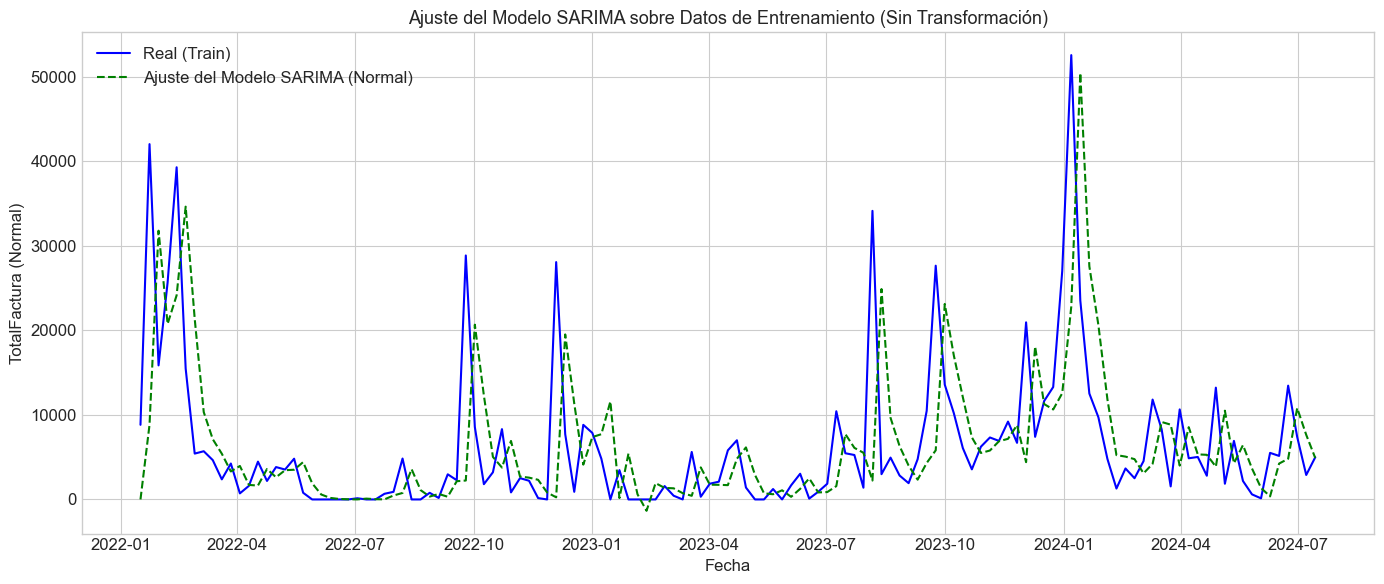

In [93]:
ajuste_train_normal = resultado_sarima.fittedvalues

# Gráfico del ajuste sobre entrenamiento
plt.figure(figsize=(14, 6))
plt.plot(train_normal.index, train_normal, label='Real (Train)', color='blue')
plt.plot(train_normal.index, ajuste_train_normal, label='Ajuste del Modelo SARIMA (Normal)', linestyle='--', color='green')
plt.xlabel("Fecha")
plt.ylabel("TotalFactura (Normal)")
plt.title("Ajuste del Modelo SARIMA sobre Datos de Entrenamiento (Sin Transformación)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 **SARIMA Cuadratica**

In [95]:
modelo_sarima_cuadrado_train = sm.tsa.SARIMAX(train_sqrt,
                                        order=(0, 1, 1),
                                        seasonal_order=(1, 1, 0, 52),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

resultado_sarima_cuadrado_train = modelo_sarima_cuadrado_train.fit()
print(resultado_sarima_cuadrado_train.summary())

                                      SARIMAX Results                                      
Dep. Variable:                   TotalFactura_sqrt   No. Observations:                  131
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 52)   Log Likelihood                -132.961
Date:                             Mon, 09 Jun 2025   AIC                            271.921
Time:                                     00:40:08   BIC                            275.696
Sample:                                 01-16-2022   HQIC                           273.008
                                      - 07-14-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   1009.144     -0.001      0.999   -1978.886    1976.886
ar.S.L52      -0.3702      

In [96]:
# --- Predicción ---
pred_sqrt = resultado_sarima_cuadrado_train.forecast(steps=len(test_sqrt))
pred_sqrt.index = test_sqrt.index  # Alinear índices

# --- Destransformación: elevar al cuadrado ---
pred_final = pred_sqrt ** 2
real_final = test_sqrt ** 2

In [97]:
pred_cuad = resultado_sarima_cuadrado_train.get_prediction()

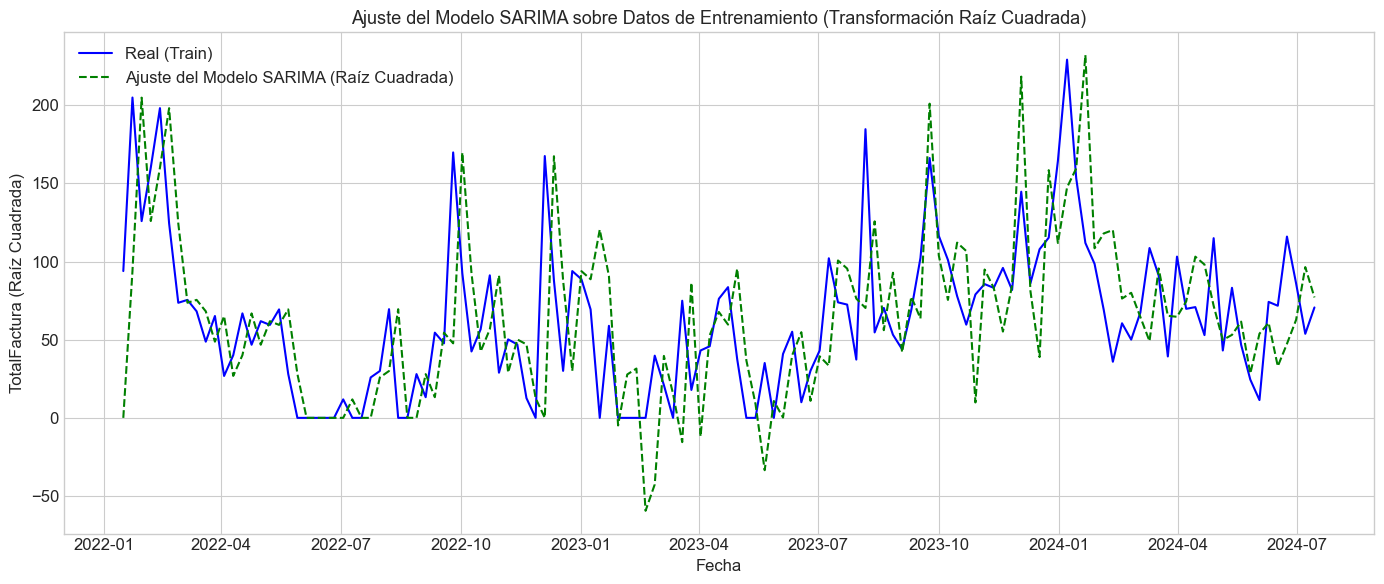

In [98]:
import matplotlib.pyplot as plt

ajuste_train_sqrt = resultado_sarima_cuadrado_train.fittedvalues

# Gráfico
plt.figure(figsize=(14, 6))
plt.plot(train_sqrt.index, train_sqrt, label='Real (Train)', color='blue')
plt.plot(train_sqrt.index, ajuste_train_sqrt, label='Ajuste del Modelo SARIMA (Raíz Cuadrada)', linestyle='--', color='green')
plt.xlabel("Fecha")
plt.ylabel("TotalFactura (Raíz Cuadrada)")
plt.title("Ajuste del Modelo SARIMA sobre Datos de Entrenamiento (Transformación Raíz Cuadrada)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [99]:
modelo_sarima_cuadrado = sm.tsa.SARIMAX(df['TotalFactura_sqrt'],
                                   order=(0,1,1),
                                   seasonal_order=(1,1,0,52),
                                   enforce_stationarity=False,
                                   enforce_invertibility=False)

resultado_sarima_cuadrado = modelo_sarima_cuadrado.fit()
print(resultado_sarima_cuadrado.summary())

                                      SARIMAX Results                                      
Dep. Variable:                   TotalFactura_sqrt   No. Observations:                  164
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 52)   Log Likelihood                -311.845
Date:                             Mon, 09 Jun 2025   AIC                            629.689
Time:                                     00:40:12   BIC                            635.922
Sample:                                 01-16-2022   HQIC                           632.122
                                      - 03-02-2025                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8825      0.066    -13.353      0.000      -1.012      -0.753
ar.S.L52      -0.4380      

In [100]:
pred_cuadrado = resultado_sarima_cuadrado.get_prediction()
pred_media_cuadrado = pred_cuadrado.predicted_mean

df['Predicción_SARIMA_cuadrado'] = pred_media_cuadrado

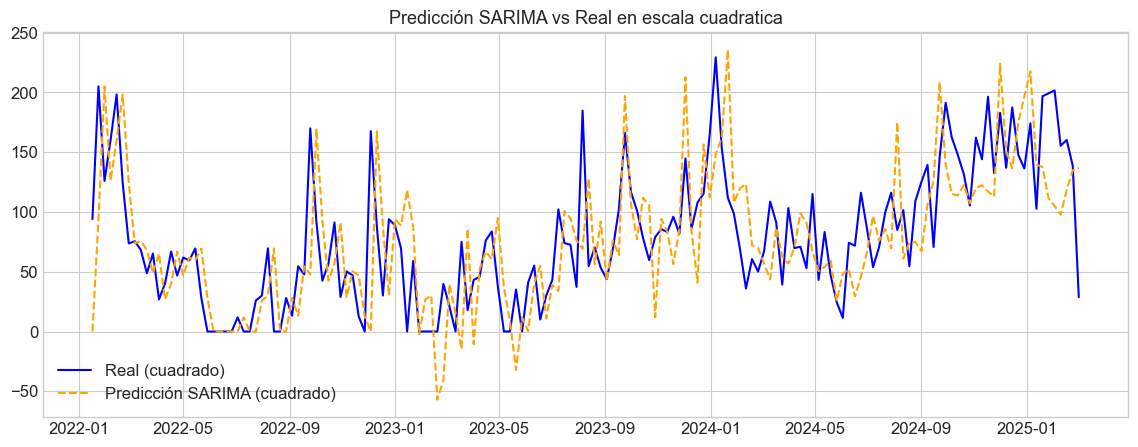

In [101]:
plt.figure(figsize=(14, 5))
plt.plot(df['TotalFactura_sqrt'], label='Real (cuadrado)', color='blue')
plt.plot(df['Predicción_SARIMA_cuadrado'], linestyle='--', label='Predicción SARIMA (cuadrado)', color='orange')
plt.title('Predicción SARIMA vs Real en escala cuadratica')
plt.legend()
plt.grid(True)
plt.show()

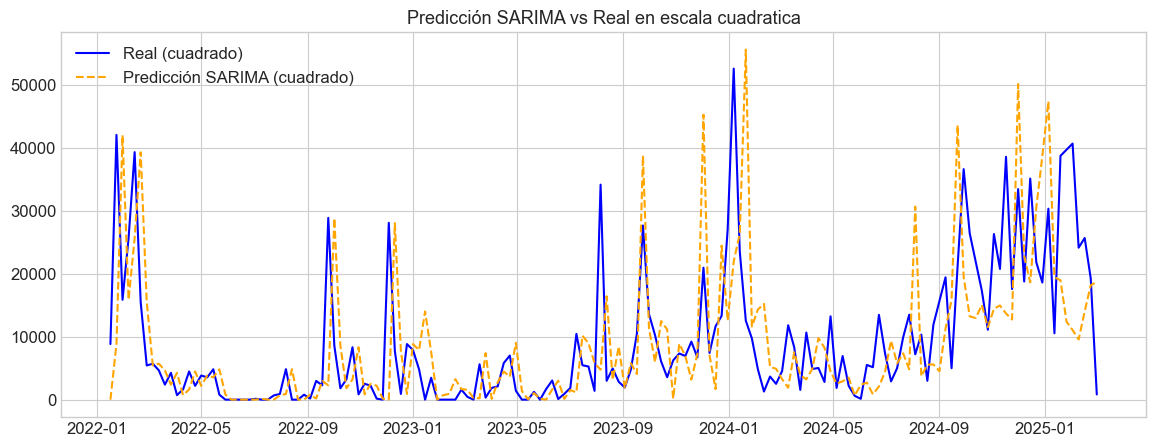

In [102]:
plt.figure(figsize=(14, 5))
plt.plot(df['TotalFactura'], label='Real (cuadrado)', color='blue')
plt.plot(df['Predicción_SARIMA_cuadrado']**2, linestyle='--', label='Predicción SARIMA (cuadrado)', color='orange')
plt.title('Predicción SARIMA vs Real en escala cuadratica')
plt.legend()
plt.grid(True)
plt.show()

 **SARIMA logaritmo**

In [104]:
modelo_sarima_logaritmo = sm.tsa.SARIMAX(train_log,
                                         order=(0, 1, 1),
                                         seasonal_order=(1, 1, 0, 52),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)

resultado_sarima_logaritmo = modelo_sarima_logaritmo.fit()
print(resultado_sarima_logaritmo.summary())

                                      SARIMAX Results                                      
Dep. Variable:                    Log_TotalFactura   No. Observations:                  131
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 52)   Log Likelihood                 -54.316
Date:                             Mon, 09 Jun 2025   AIC                            114.631
Time:                                     00:40:16   BIC                            118.405
Sample:                                 01-16-2022   HQIC                           115.718
                                      - 07-14-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5472      0.155     -3.522      0.000      -0.852      -0.243
ar.S.L52      -0.7664      

prediccion

In [106]:
# --- Predicción ---
pred_log = resultado_sarima_logaritmo.forecast(steps=len(test_log))
pred_log.index = test_log.index

# --- Destransformación ---
pred_final_log = np.expm1(pred_log)         # exp(x) - 1
real_final_log = np.expm1(test_log)         # Valores reales también destransformados

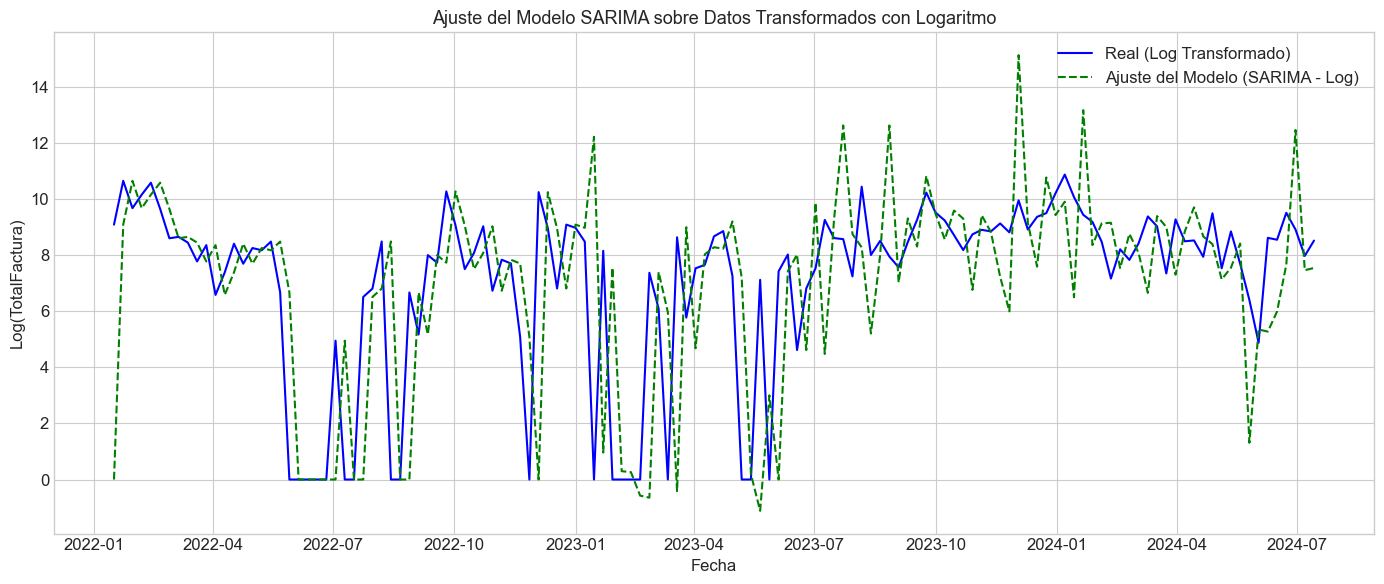

In [107]:
import matplotlib.pyplot as plt

# Obtener las predicciones dentro del conjunto de entrenamiento (in-sample)
fitted_values_log = resultado_sarima_logaritmo.fittedvalues
fitted_values_log.index = train_log.index  # Asegurar que los índices coincidan

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(train_log, label='Real (Log Transformado)', color='blue')
plt.plot(fitted_values_log, label='Ajuste del Modelo (SARIMA - Log)', color='green', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Log(TotalFactura)')
plt.title('Ajuste del Modelo SARIMA sobre Datos Transformados con Logaritmo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**SARIMA yeojohnson**

In [109]:
modelo_sarima_yeojohnson_train = sm.tsa.SARIMAX(train_yj,
                                                order=(0, 1, 1),
                                                seasonal_order=(1, 1, 0, 52),
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
resultado_sarima_yeojohnson_train = modelo_sarima_yeojohnson_train.fit()
print(resultado_sarima_yeojohnson_train.summary())

                                      SARIMAX Results                                      
Dep. Variable:             TotalFactura_yeojohnson   No. Observations:                  131
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 52)   Log Likelihood                 -28.504
Date:                             Mon, 09 Jun 2025   AIC                             63.008
Time:                                     00:40:20   BIC                             66.782
Sample:                                 01-16-2022   HQIC                            64.095
                                      - 07-14-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0001    258.174     -0.004      0.997    -507.012     505.012
ar.S.L52      -0.4387      

prediccion

In [111]:
pred_yj = resultado_sarima_yeojohnson_train.forecast(steps=len(test_yj))
pred_yj.index = test_yj.index

grafica

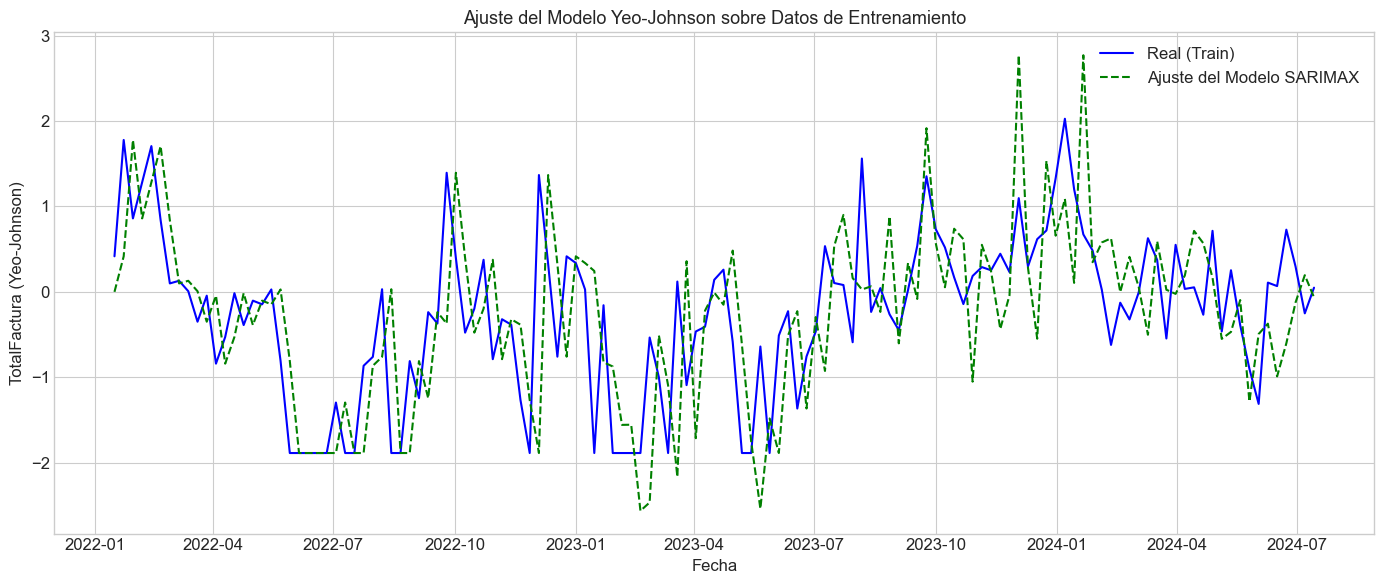

In [113]:
import matplotlib.pyplot as plt

# Obtener el ajuste del modelo sobre el set de entrenamiento
ajuste_train = resultado_sarima_yeojohnson_train.fittedvalues

# Gráfica
plt.figure(figsize=(14, 6))
plt.plot(train_yj.index, train_yj, label='Real (Train)', color='blue')
plt.plot(train_yj.index, ajuste_train, label='Ajuste del Modelo SARIMAX', linestyle='--', color='green')
plt.xlabel("Fecha")
plt.ylabel("TotalFactura (Yeo-Johnson)")
plt.title("Ajuste del Modelo Yeo-Johnson sobre Datos de Entrenamiento")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [114]:
modelo_sarima_yeojohnson_pred = sm.tsa.SARIMAX(df['TotalFactura_yeojohnson'],
                                   order=(0,1,1),
                                   seasonal_order=(1,1,0,52),
                                   enforce_stationarity=False,
                                   enforce_invertibility=False)

resultado_sarima_yeojohnson_pred = modelo_sarima_yeojohnson_pred.fit()
print(resultado_sarima_yeojohnson_pred.summary())

                                      SARIMAX Results                                      
Dep. Variable:             TotalFactura_yeojohnson   No. Observations:                  164
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 52)   Log Likelihood                 -67.852
Date:                             Mon, 09 Jun 2025   AIC                            141.705
Time:                                     00:40:24   BIC                            147.937
Sample:                                 01-16-2022   HQIC                           144.138
                                      - 03-02-2025                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0617      0.063    -16.933      0.000      -1.185      -0.939
ar.S.L52      -0.3730      

### **SARIMAX**

In [116]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Variables exógenas
exog_train = df[['cierre_hotel']][:train_size_sqrt]

# modelo
modelo_sarimax_Train = SARIMAX(train_sqrt,
                         exog=exog_train,
                         order=(0,1,1),
                         seasonal_order=(1,1,0,52)
                         )

resultado_sarimax_Train = modelo_sarimax_Train.fit()
print(resultado_sarimax_Train.summary())

                                      SARIMAX Results                                      
Dep. Variable:                   TotalFactura_sqrt   No. Observations:                  131
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 52)   Log Likelihood                -407.847
Date:                             Mon, 09 Jun 2025   AIC                            823.694
Time:                                     00:40:29   BIC                            833.121
Sample:                                 01-16-2022   HQIC                           827.468
                                      - 07-14-2024                                         
Covariance Type:                               opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
cierre_hotel    24.3045     37.619      0.646      0.518     -49.428      98.037
ma.L1           -0.58

In [117]:
pred_sarimax_train = resultado_sarimax_Train.get_prediction()
pred_media_sarimax_train = pred_sarimax_train.predicted_mean

df['Predicción_SARIMA_sarimax_train'] = pred_media_sarimax_train

In [118]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Variables exógenas
exog = df[['cierre_hotel']]

# modelo
modelo_sarimax = SARIMAX(df['TotalFactura_sqrt'],
                         exog=exog,
                         order=(1,1,1),
                         seasonal_order=(1,1,0,52)
                         )

resultado_sarimax = modelo_sarimax.fit()
print(resultado_sarimax.summary())

                                      SARIMAX Results                                      
Dep. Variable:                   TotalFactura_sqrt   No. Observations:                  164
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 52)   Log Likelihood                -584.139
Date:                             Mon, 09 Jun 2025   AIC                           1178.278
Time:                                     00:40:36   BIC                           1191.826
Sample:                                 01-16-2022   HQIC                          1183.774
                                      - 03-02-2025                                         
Covariance Type:                               opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
cierre_hotel    25.0704     33.720      0.743      0.457     -41.019      91.160
ar.L1            0.36

In [119]:
pred_sarimax = resultado_sarimax.get_prediction()
pred_media_sarimax = pred_sarimax.predicted_mean

df['Predicción_SARIMA_sarimax'] = pred_media_sarimax

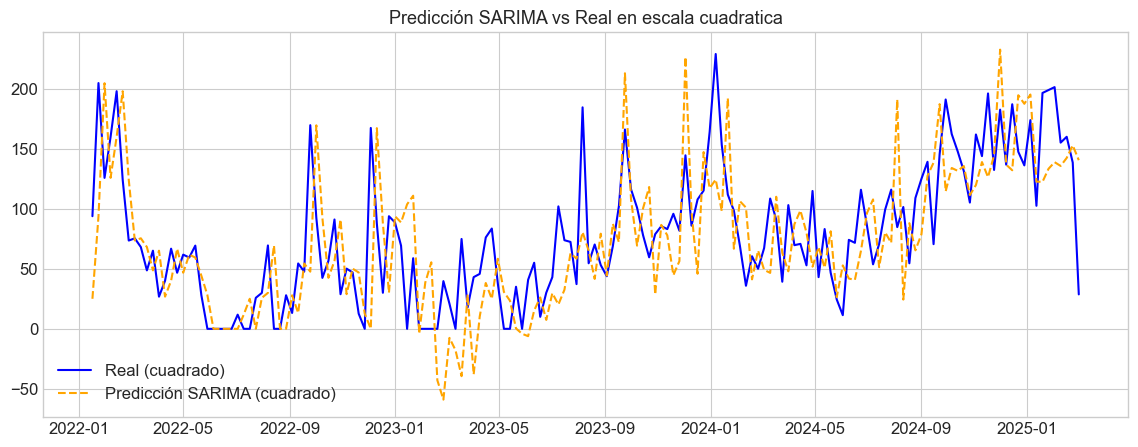

In [120]:
plt.figure(figsize=(14, 5))
plt.plot(df['TotalFactura_sqrt'], label='Real (cuadrado)', color='blue')
plt.plot(df['Predicción_SARIMA_sarimax'], linestyle='--', label='Predicción SARIMA (cuadrado)', color='orange')
plt.title('Predicción SARIMA vs Real en escala cuadratica')
plt.legend()
plt.grid(True)
plt.show()

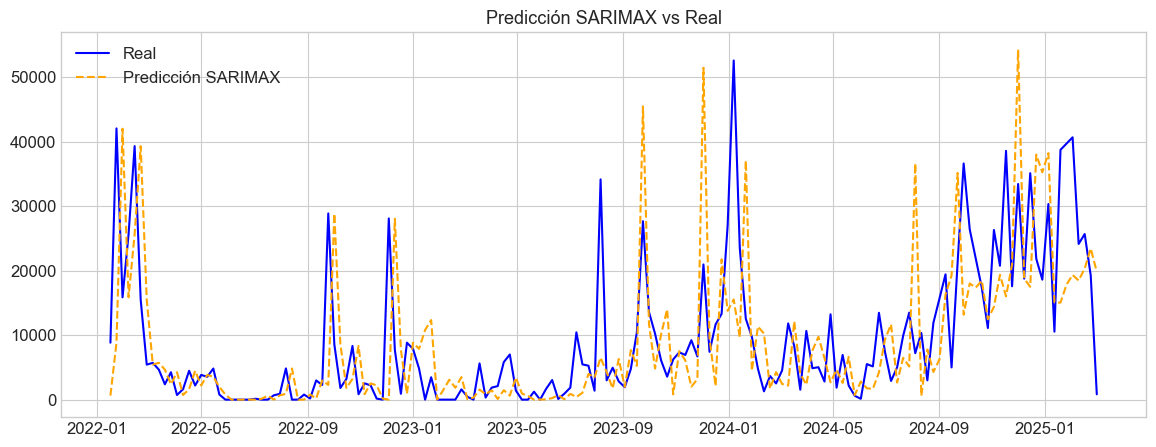

In [121]:
plt.figure(figsize=(14, 5))
plt.plot(df['TotalFactura'], label='Real', color='blue')
plt.plot(df['Predicción_SARIMA_sarimax']**2, linestyle='--', label='Predicción SARIMAX', color='orange')
plt.title('Predicción SARIMAX vs Real')
plt.legend()
plt.grid(True)
plt.show()

predicciones

In [123]:
fittedSARIMAX = resultado_sarimax.fittedvalues
fitted_invSARIMAX = fittedSARIMAX**2
realSARIMAX = df['TotalFactura']

## **Fase 5**: Evaluacion

 **Hotel Resort**

### **Resultados ARIMA**

In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(df['TotalFactura'], df['Predicción_ARIMA']))
mae = mean_absolute_error(df['TotalFactura'], df['Predicción_ARIMA'])
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 8879.534213377545
MAE: 5843.439542854833


In [128]:
rmse = np.sqrt(mean_squared_error(test_normal, prediccion_arima))
mae = mean_absolute_error(test_normal, prediccion_arima)
mape = np.mean(np.abs((test_normal - prediccion_arima) / test_normal)) * 100

In [129]:
print(f"\nRMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 11346.63
MAE: 9012.08
MAPE: 120.99%


### **Resultados SARIMA**

**Resultados SARIMA sin transformaciones**

In [132]:
rmse = np.sqrt(mean_squared_error(test_normal, pred))
mae = mean_absolute_error(test_normal, pred)
mape = np.mean(np.abs((test_normal - pred) / test_normal)) * 100

print(f"SARIMA - RMSE: {rmse:.2f}")
print(f"SARIMA - MAE: {mae:.2f}")
print(f"SARIMA - MAPE: {mape:.2f}%")

SARIMA - RMSE: 19138.74
SARIMA - MAE: 16189.93
SARIMA - MAPE: 105.25%


 **Resultados SARIMA con Transformacion Cuadratica**

In [134]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(df['TotalFactura_sqrt'], df['Predicción_SARIMA_cuadrado']))
print(f"RMSE: {rmse}")

# Calcular MAE
mae = mean_absolute_error(df['TotalFactura_sqrt'], df['Predicción_SARIMA_cuadrado'])
print(f"MAE: {mae}")

RMSE: 48.378069362078506
MAE: 37.25382457541598


In [135]:

y_pred = np.square(pred_cuadrado.predicted_mean)

# Cortar para que coincidan longitudes si es necesario
y_true = df['TotalFactura'].iloc[-len(y_pred):].values

# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"\nSARIMA (sqrt) - RMSE: {rmse:.2f}")
print(f"SARIMA (sqrt) - MAE: {mae:.2f}")


SARIMA (sqrt) - RMSE: 10792.99
SARIMA (sqrt) - MAE: 6939.05


In [136]:

y_pred = np.square(pred_cuad.predicted_mean)

# Cortar para que coincidan longitudes si es necesario
y_true = df['TotalFactura'].iloc[-len(y_pred):].values

# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)


print(f"\nSARIMA (sqrt) - RMSE: {rmse:.2f}")
print(f"SARIMA (sqrt) - MAE: {mae:.2f}")


SARIMA (sqrt) - RMSE: 14982.11
SARIMA (sqrt) - MAE: 10172.53


**SARIMA transformacion logaritmica**

In [138]:
# --- Métricas ---
rmse_log = np.sqrt(mean_squared_error(real_final_log, pred_final_log))
mae_log = mean_absolute_error(real_final_log, pred_final_log)
mape_log = np.mean(np.abs((real_final_log - pred_final_log) / real_final_log)) * 100

print(f"\nSARIMA (Log) - RMSE: {rmse_log:.2f}")
print(f"SARIMA (Log) - MAE: {mae_log:.2f}")
print(f"SARIMA (Log) - MAPE: {mape_log:.2f}%")


SARIMA (Log) - RMSE: 3136290.11
SARIMA (Log) - MAE: 1750498.12
SARIMA (Log) - MAPE: 10046.02%


**SARIMA transformacion jhonson**

In [140]:
pred_final_yj = pt.inverse_transform(pred_yj.to_frame().rename(columns={'predicted_mean': 'TotalFactura'}))
real_final_yj = pt.inverse_transform(test_yj.to_frame().rename(columns={'TotalFactura_yeojohnson': 'TotalFactura'}))

# --- Métricas ---
rmse_yj = np.sqrt(mean_squared_error(real_final_yj, pred_final_yj))
mae_yj = mean_absolute_error(real_final_yj, pred_final_yj)
mape_yj = np.mean(np.abs((real_final_yj - pred_final_yj) / real_final_yj)) * 100

print(f"\nSARIMA (Yeo-Johnson) - RMSE: {rmse_yj:.2f}")
print(f"SARIMA (Yeo-Johnson) - MAE: {mae_yj:.2f}")
print(f"SARIMA (Yeo-Johnson) - MAPE: {mape_yj:.2f}%")


SARIMA (Yeo-Johnson) - RMSE: 16798.81
SARIMA (Yeo-Johnson) - MAE: 13367.08
SARIMA (Yeo-Johnson) - MAPE: 90.39%


In [141]:
fitted = resultado_sarima_yeojohnson_pred.fittedvalues
fitted_inv = pt.inverse_transform(fitted.to_frame(name='TotalFactura'))

In [142]:
real = df['TotalFactura']
rmse = np.sqrt(mean_squared_error(real[1:], fitted_inv[1:]))  # saltar el primer NA
mae = mean_absolute_error(real[1:], fitted_inv[1:])

print(f"SARIMA (Yeo-Johnson) - RMSE: {rmse:.2f}")
print(f"SARIMA (Yeo-Johnson) - MAE: {mae:.2f}")

SARIMA (Yeo-Johnson) - RMSE: 14628.09
SARIMA (Yeo-Johnson) - MAE: 8276.89


### **SARIMAX**

In [144]:
y_pred = np.square(pred_sarimax.predicted_mean)

y_true = df['TotalFactura'].iloc[-len(y_pred):].values

# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"\nSARIMA (sqrt) - RMSE: {rmse:.2f}")
print(f"SARIMA (sqrt) - MAE: {mae:.2f}")


SARIMA (sqrt) - RMSE: 10390.20
SARIMA (sqrt) - MAE: 6694.85


In [145]:
y_pred = np.square(pred_sarimax_train.predicted_mean)

y_true = df['TotalFactura'].iloc[-len(y_pred):].values

# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"\nSARIMAX (sqrt) - RMSE: {rmse:.2f}")
print(f"SARIMAX (sqrt) - MAE: {mae:.2f}")


SARIMAX (sqrt) - RMSE: 14981.77
SARIMAX (sqrt) - MAE: 10114.16


## **Fase 6**: Despliegue

**Hotel Resort**

### **ARIMA**

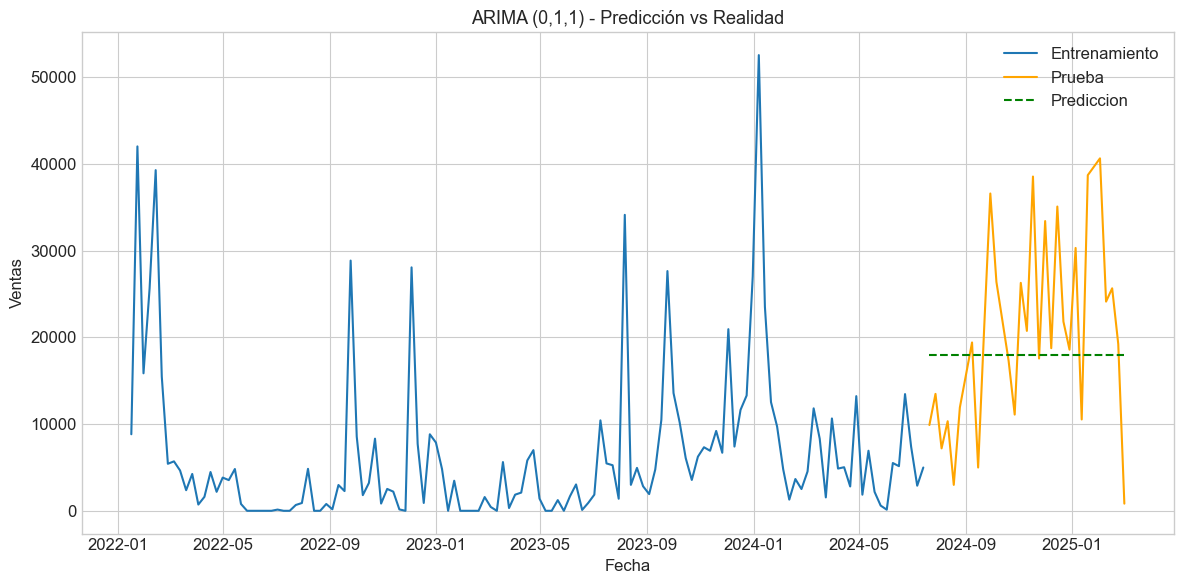

In [149]:
plt.figure(figsize=(12, 6))
plt.plot(train_normal.index, train_normal, label='Entrenamiento')
plt.plot(test_normal.index, test_normal, label='Prueba', color='orange')
plt.plot(prediccion_arima.index, prediccion_arima, label='Prediccion', color='green', linestyle='--')
plt.title('ARIMA (0,1,1) - Predicción vs Realidad')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **SARIMA**

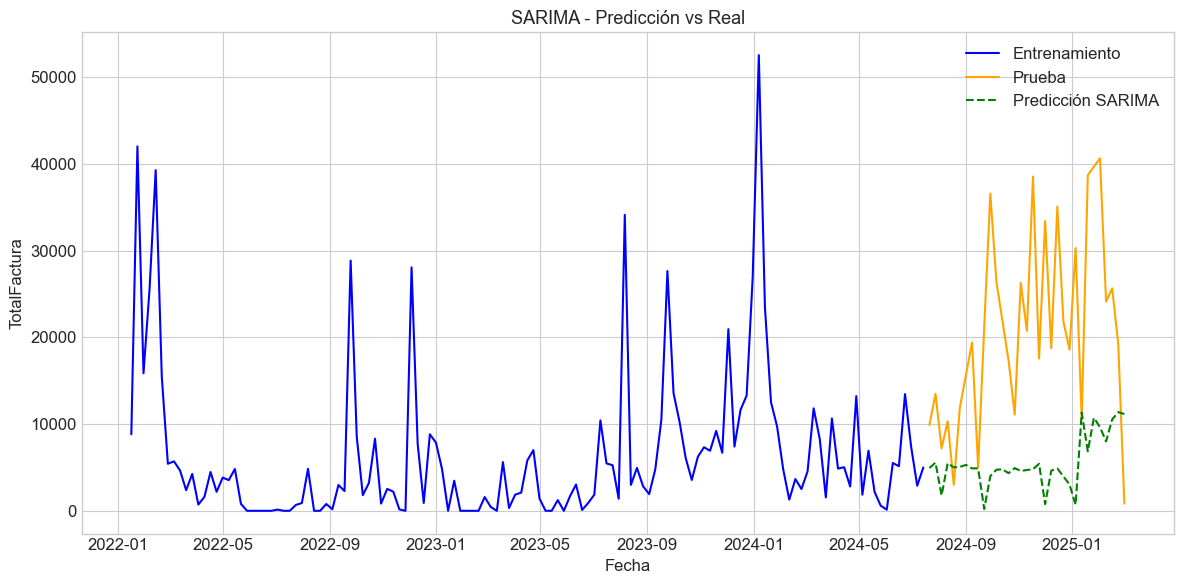

In [151]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size], train_normal, label='Entrenamiento', color='blue')
plt.plot(df.index[train_size:], test_normal, label='Prueba', color='orange')
plt.plot(df.index[train_size:], pred, label='Predicción SARIMA', color='green', linestyle='--')
plt.title("SARIMA - Predicción vs Real")
plt.xlabel("Fecha")
plt.ylabel("TotalFactura")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**SARIMA transformacion cuadaratica**


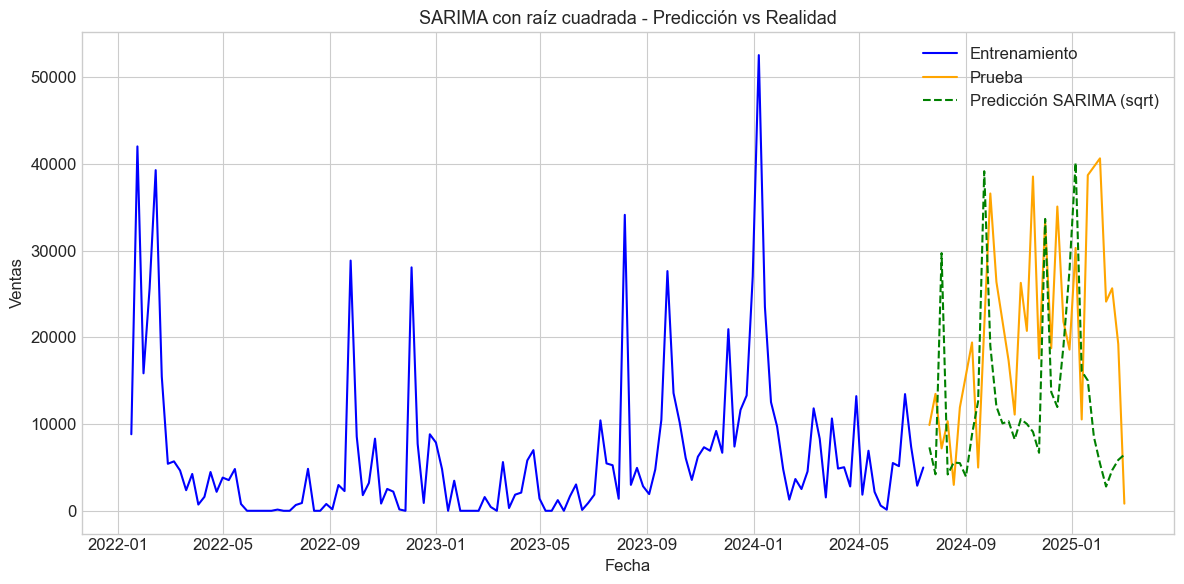

In [153]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size_sqrt], train_sqrt**2, label='Entrenamiento', color='blue')
plt.plot(df.index[train_size_sqrt:], real_final, label='Prueba', color='orange')
plt.plot(df.index[train_size_sqrt:], pred_final, label='Predicción SARIMA (sqrt)', color='green', linestyle='--')
plt.title('SARIMA con raíz cuadrada - Predicción vs Realidad')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**SARIMAX**

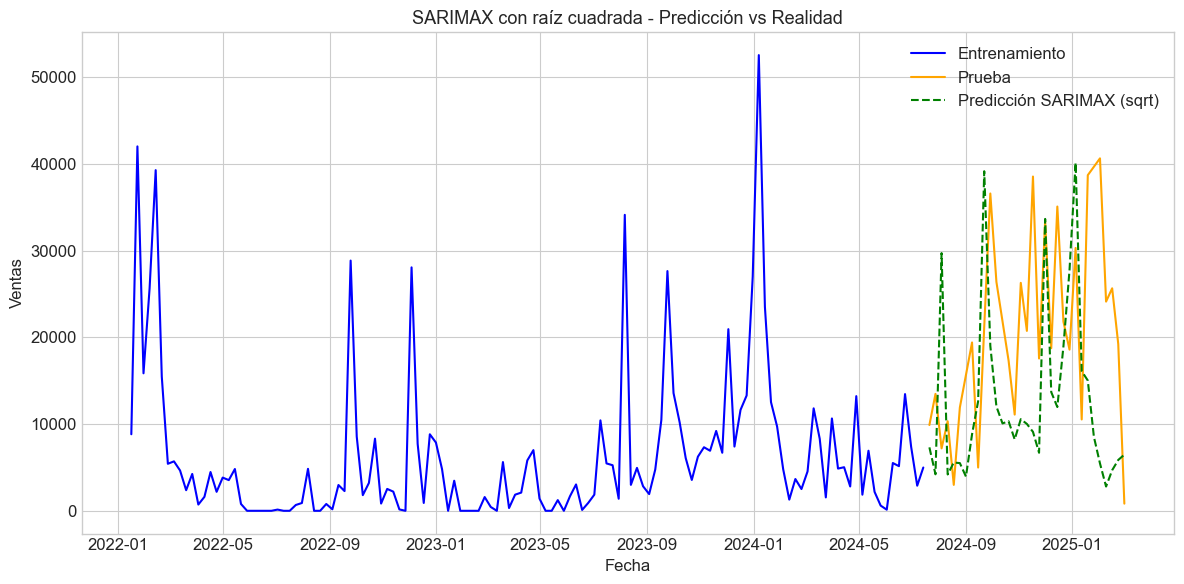

In [155]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size_sqrt], train_sqrt**2, label='Entrenamiento', color='blue')
plt.plot(df.index[train_size_sqrt:], real_final, label='Prueba', color='orange')
plt.plot(df.index[train_size_sqrt:], pred_final, label='Predicción SARIMAX (sqrt)', color='green', linestyle='--')
plt.title('SARIMAX con raíz cuadrada - Predicción vs Realidad')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

fechas futuras

In [157]:
forecast = resultado_sarima_cuadrado.get_forecast(steps=52)
pred_mean_trans = forecast.predicted_mean
pred_inv = pred_mean_trans**2

In [158]:
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=52, freq='W')

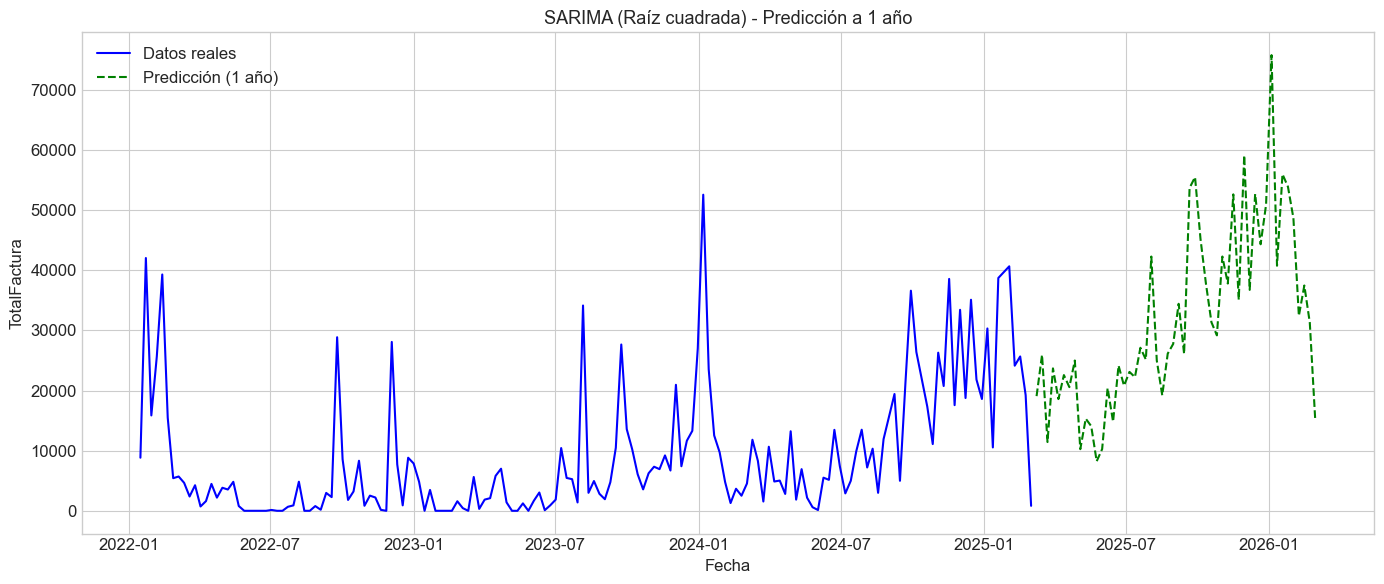

In [159]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['TotalFactura'], label='Datos reales', color='blue')
plt.plot(future_dates, pred_inv, label='Predicción (1 año)', color='green', linestyle='--')
plt.title("SARIMA (Raíz cuadrada) - Predicción a 1 año")
plt.xlabel("Fecha")
plt.ylabel("TotalFactura")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**SARIMA log**

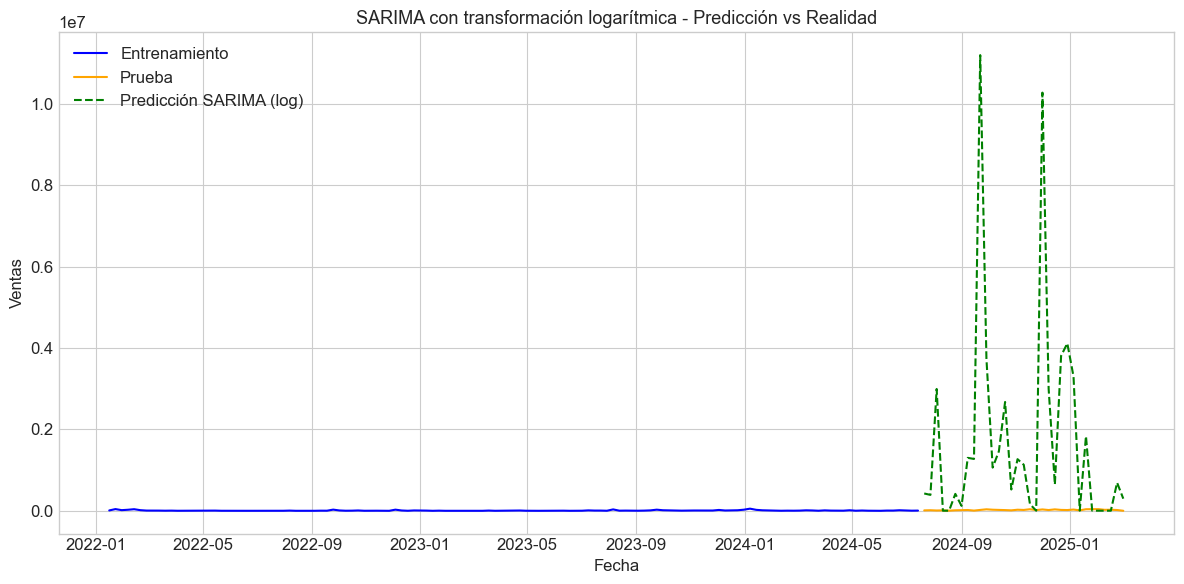

In [161]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size_log], np.expm1(train_log), label='Entrenamiento', color='blue')
plt.plot(df.index[train_size_log:], real_final_log, label='Prueba', color='orange')
plt.plot(df.index[train_size_log:], pred_final_log, label='Predicción SARIMA (log)', color='green', linestyle='--')
plt.title('SARIMA con transformación logarítmica - Predicción vs Realidad')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**SARIMA yeojohnson**


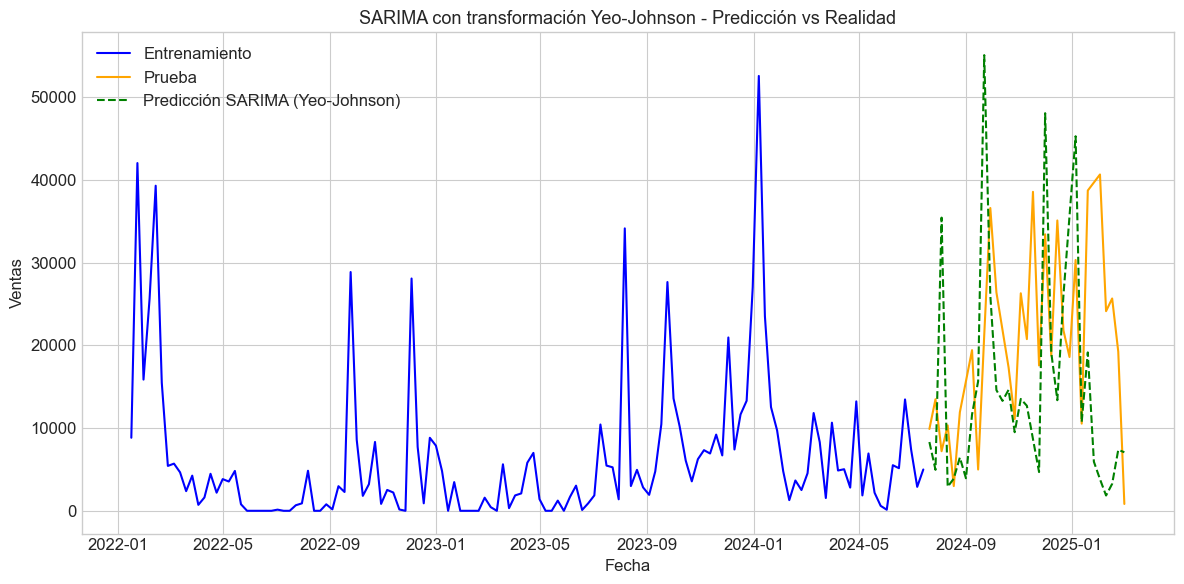

In [163]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size_yj], pt.inverse_transform(train_yj.to_frame().rename(columns={'TotalFactura_yeojohnson': 'TotalFactura'})), label='Entrenamiento', color='blue')
plt.plot(df.index[train_size_yj:], real_final_yj, label='Prueba', color='orange')
plt.plot(df.index[train_size_yj:], pred_final_yj, label='Predicción SARIMA (Yeo-Johnson)', color='green', linestyle='--')
plt.title('SARIMA con transformación Yeo-Johnson - Predicción vs Realidad')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [164]:
pred_steps = 52
pred_yeojohnson = resultado_sarima_yeojohnson_pred.get_forecast(steps=pred_steps)
pred_mean_trans = pred_yeojohnson.predicted_mean

In [165]:
pred_mean_inv = pt.inverse_transform(pred_mean_trans.to_frame(name='TotalFactura'))

In [166]:
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=pred_steps, freq='W')


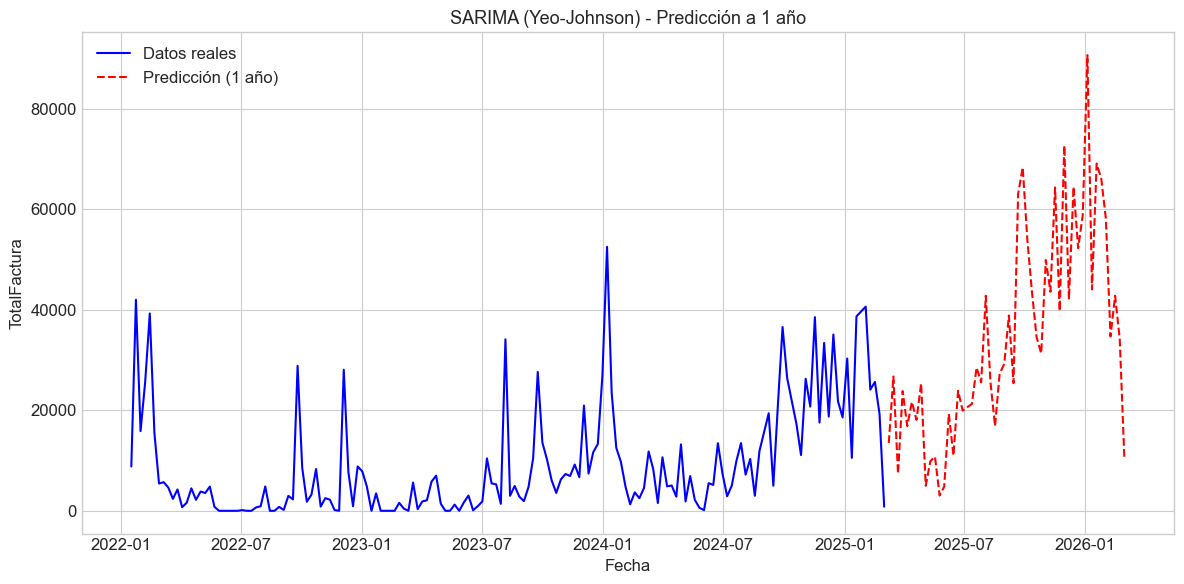

In [167]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['TotalFactura'], label='Datos reales', color='blue')
plt.plot(future_dates, pred_mean_inv, label='Predicción (1 año)', color='red', linestyle='--')
plt.title("SARIMA (Yeo-Johnson) - Predicción a 1 año")
plt.xlabel("Fecha")
plt.ylabel("TotalFactura")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **Grafica SARIMAX**

In [169]:
último_valor = df['cierre_hotel'].iloc[-1]
exog_futuro = pd.DataFrame({'cierre_hotel': [último_valor] * 52})

forecast = resultado_sarimax.get_forecast(steps=52, exog=exog_futuro)
pred_mean_trans = forecast.predicted_mean
pred_inv = pred_mean_trans**2

In [170]:
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=52, freq='W')

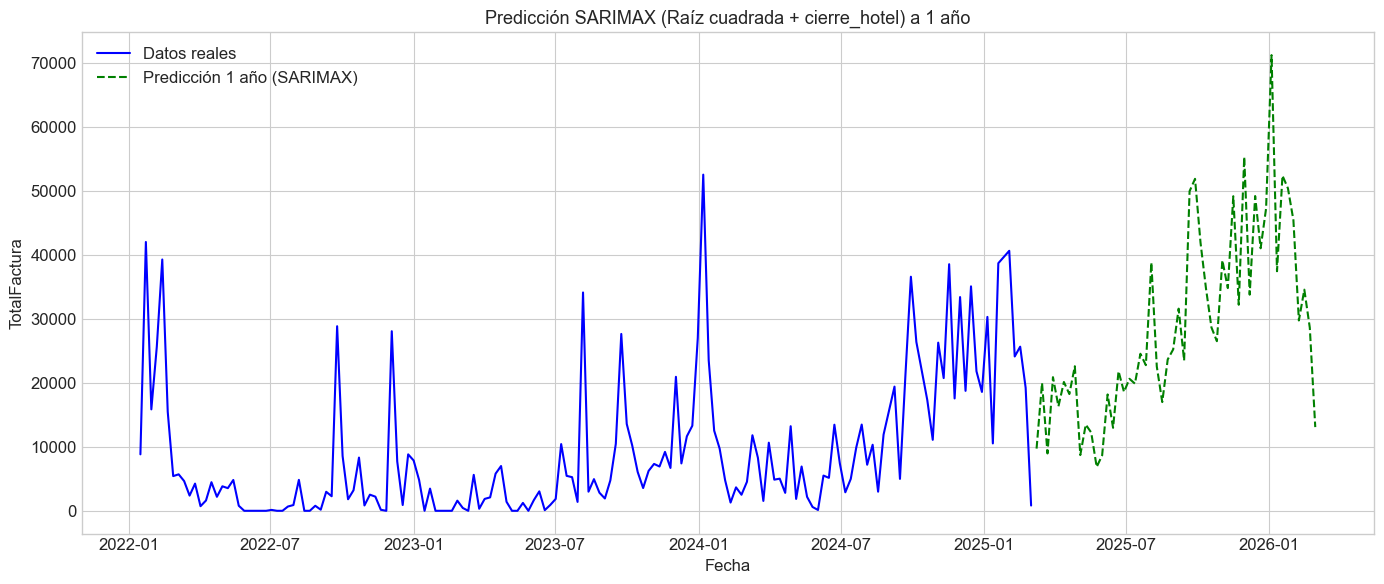

In [171]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['TotalFactura'], label='Datos reales', color='blue')
plt.plot(future_dates, pred_inv, label='Predicción 1 año (SARIMAX)', color='green', linestyle='--')
plt.title("Predicción SARIMAX (Raíz cuadrada + cierre_hotel) a 1 año")
plt.xlabel("Fecha")
plt.ylabel("TotalFactura")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig(r"../Graficos/prediccion_sarimax.png", dpi=300)

plt.show()

In [172]:
df['Fecha'] = df.index
print(df.head())

            TotalFactura  Diferenciada  TotalFactura_sqrt  Log_TotalFactura  \
2022-01-16        8829.0           NaN          93.962759          9.085910   
2022-01-23       42031.0       33202.0         205.014634         10.646187   
2022-01-30       15859.0      -26172.0         125.932522          9.671555   
2022-02-06       25654.0        9795.0         160.168661         10.152494   
2022-02-13       39293.4       13639.4         198.225629         10.578837   

            TotalFactura_yeojohnson  campaña_marketing  cierre_hotel  \
2022-01-16                 0.416231                  1             1   
2022-01-23                 1.777699                  1             1   
2022-01-30                 0.859400                  1             1   
2022-02-06                 1.281456                  1             1   
2022-02-13                 1.705916                  1             1   

            Predicción_ARIMA  Predicción_SARIMA_cuadrado  \
2022-01-16          0.000000    

In [173]:
df

,TotalFactura,Diferenciada,TotalFactura_sqrt,Log_TotalFactura,TotalFactura_yeojohnson,campaña_marketing,cierre_hotel,Predicción_ARIMA,Predicción_SARIMA_cuadrado,Predicción_SARIMA_sarimax_train,Predicción_SARIMA_sarimax,Fecha
2022-01-16,8829.0,NaN,93.962759,9.085910,0.416231,1,1,0.000000,0.000000,24.304485,25.070408,2022-01-16
2022-01-23,42031.0,33202.0,205.014634,10.646187,1.777699,1,1,4757.490892,93.962759,93.919673,93.930129,2022-01-23
2022-01-30,15859.0,-26172.0,125.932522,9.671555,0.859400,1,1,19937.094805,204.906024,204.877399,204.897649,2022-01-30
2022-02-06,25654.0,9795.0,160.168661,10.152494,1.281456,1,1,18480.809794,126.009692,126.030042,125.964557,2022-02-06
2022-02-13,39293.4,13639.4,198.225629,10.578837,1.705916,1,1,20888.712194,160.135282,160.126490,160.147985,2022-02-13
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-02,40653.0,970.0,201.625891,10.612853,1.742002,0,1,30713.452587,105.121213,NaN,139.035469,2025-02-02
2025-02-09,24129.0,-16524.0,155.335122,10.091211,1.224482,0,1,33873.584682,97.726559,NaN,135.874006,2025-02-09
2025-02-16,25663.5,1534.5,160.198315,10.152864,1.281803,0,1,30775.438104,118.332300,NaN,142.560989,2025-02-16
2025-02-23,19234.0,-6429.5,138.686697,9.864487,1.021953,0,1,29150.172989,134.820691,NaN,153.047640,2025-02-23


In [174]:
# Guardar en CSV
df.to_csv(r"../Documentos/datosOriginales.csv", index=False)
print("Archivo 'datosOriginales.csv' guardado correctamente.")

Archivo 'datosOriginales.csv' guardado correctamente.


In [175]:
# Crear DataFrame con las predicciones
df_pred_sarimax = pd.DataFrame({
    'fecha': future_dates,  # Use future_dates for the 'fecha' column
    'prediccion_totalfactura': pred_inv  # Use pred_inv for the 'prediccion_totalfactura' column
})

# Guardar en CSV
df_pred_sarimax.to_csv(r"../Documentos/predicciones_sarimax.csv", index=False)

print("Archivo 'predicciones_sarimax_1_ano.csv' guardado correctamente.")

Archivo 'predicciones_sarimax_1_ano.csv' guardado correctamente.


In [176]:
df_pred_sarimax


,fecha,prediccion_totalfactura
2025-03-09,2025-03-09,9725.790908
2025-03-16,2025-03-16,19991.236135
2025-03-23,2025-03-23,8967.958008
2025-03-30,2025-03-30,20892.598524
2025-04-06,2025-04-06,16322.089744
2025-04-13,2025-04-13,20138.638323
2025-04-20,2025-04-20,18253.842812
2025-04-27,2025-04-27,22600.989900
2025-05-04,2025-05-04,8714.416882
2025-05-11,2025-05-11,13476.555094
